In [78]:
import numpy as np
import torch
import random
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:64'

import utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
# Global variable model:

model_name = 'microsoft/Phi-3-mini-4k-instruct' #"openai-community/gpt2-xl" #"meta-llama/Llama-2-7b-hf" #openai-community/gpt2-xl 'microsoft/Phi-3-mini-4k-instruct
dataset_path = 'datasets/ilikecats_20000.csv' #'datasets/(non)animal_2000_gpt-4-turbo.csv'

# # Load model and dataset
# model = utils.LinearFeatureWrapper(model_name, data
model_hf = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype = torch.float16,  trust_remote_code=True)
tokenizer_hf = AutoTokenizer.from_pretrained(model_name)
layers = model_hf.model.layers # Depends on model! Typically model.model.layers. For gpt2: model.transformer.h

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attenton` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.
Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset_size = 1028

dataset = utils.Dataset()
dataset.load_data(dataset_path, 'Animal', 'Non-Animal')
pos_dataset, neg_dataset = dataset.get_pos_neg_dataset(dataset_size)

In [ ]:
model = utils.LinearFeatureWrapper(model_hf, tokenizer_hf, layers, pos_dataset, neg_dataset)
model.batch_size = 16
model.get_pos_neg_activations(dataset_size = -1)


Processing batch 1/65
Processing batch 2/65
Processing batch 3/65
Processing batch 4/65
Processing batch 5/65
Processing batch 6/65
Processing batch 7/65
Processing batch 8/65
Processing batch 9/65
Processing batch 10/65
Processing batch 11/65
Processing batch 12/65
Processing batch 13/65
Processing batch 14/65
Processing batch 15/65
Processing batch 16/65
Processing batch 17/65
Processing batch 18/65
Processing batch 19/65
Processing batch 20/65
Processing batch 21/65
Processing batch 22/65
Processing batch 23/65
Processing batch 24/65
Processing batch 25/65
Processing batch 26/65
Processing batch 27/65
Processing batch 28/65
Processing batch 29/65
Processing batch 30/65
Processing batch 31/65
Processing batch 32/65
Processing batch 33/65
Processing batch 34/65
Processing batch 35/65
Processing batch 36/65
Processing batch 37/65
Processing batch 38/65
Processing batch 39/65
Processing batch 40/65
Processing batch 41/65
Processing batch 42/65
Processing batch 43/65
Processing batch 44/

Processing batch 1/33
Processing batch 2/33
Processing batch 3/33
Processing batch 4/33
Processing batch 5/33
Processing batch 6/33
Processing batch 7/33
Processing batch 8/33
Processing batch 9/33
Processing batch 10/33
Processing batch 11/33
Processing batch 12/33
Processing batch 13/33
Processing batch 14/33
Processing batch 15/33
Processing batch 16/33
Processing batch 17/33
Processing batch 18/33
Processing batch 19/33
Processing batch 20/33
Processing batch 21/33
Processing batch 22/33
Processing batch 23/33
Processing batch 24/33
Processing batch 25/33
Processing batch 26/33
Processing batch 27/33
Processing batch 28/33
Processing batch 29/33
Processing batch 30/33
Processing batch 31/33
Processing batch 32/33


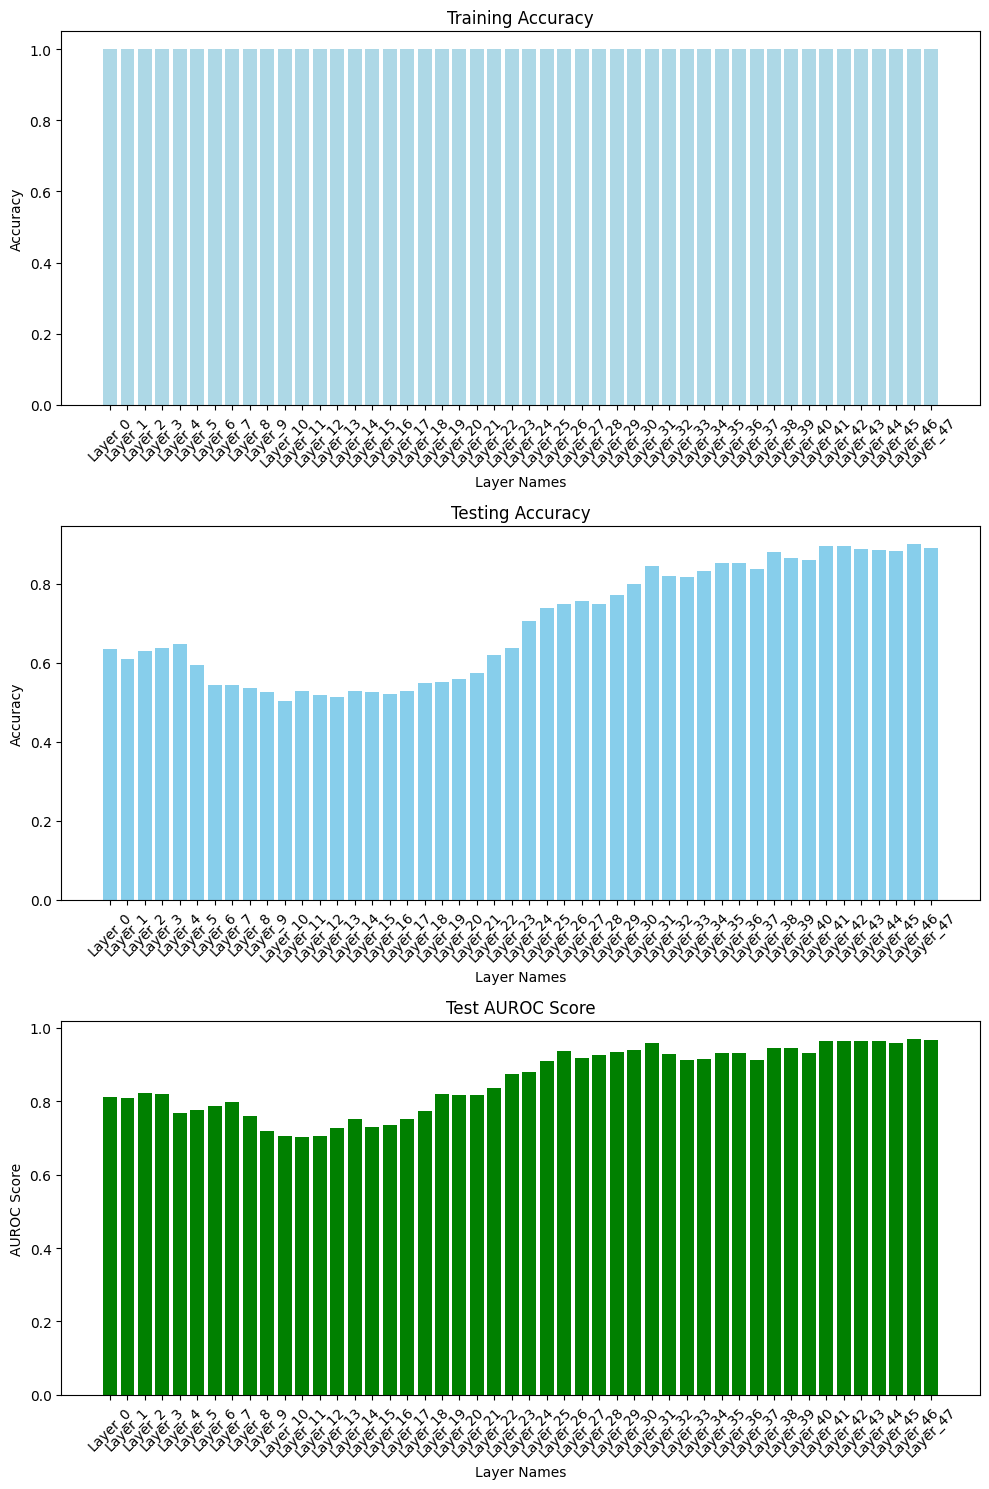

In [ ]:
test_dataset = utils.Dataset()
test_dataset.load_data('datasets/(non)animal_2000_gpt-4-turbo.csv', 'Animal', 'Non-Animal')
test_dataset_size = dataset_size
test_dataset_size = 256

test_dataset_1, labels = test_dataset.combine_dataset_get_labels(test_dataset_size)
_ = model.train_and_evaluate_probes(test_dataset_1, labels)